In [173]:
import pandas as pd

# Load the movie dataset
movie_df = pd.read_csv(r"TMDB 10000 Movies Dataset.csv")

# Check for missing values
print(movie_df.isnull().sum())

movie_df

id                   0
original_language    0
original_title       0
overview             6
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


,id,original_language,original_title,overview,popularity,release_date,title,vote_average,vote_count
0,851644,ko,20세기 소녀,Yeon-du asks her best friend Bora to collect a...,170.540,2022-10-06,20th Century Girl,8.7,290
1,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",86.518,1972-03-14,The Godfather,8.7,16988
2,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,84.681,1994-09-23,The Shawshank Redemption,8.7,22748
3,240,en,The Godfather Part II,In the continuing saga of the Corleone crime f...,44.957,1974-12-20,The Godfather Part II,8.6,10293
4,667257,es,Cosas imposibles,"Matilde is a woman who, after the death of her...",32.859,2021-06-17,Impossible Things,8.6,299
...,...,...,...,...,...,...,...,...,...
9995,11375,en,Hollywood Homicide,"Joe Gavilan and his new partner K. C. Calden, ...",9.532,2003-06-09,Hollywood Homicide,5.3,529
9996,298614,fr,Une heure de tranquillité,"Michel, who's crazy about jazz, has just found...",5.835,2014-12-31,Do Not Disturb,5.3,304
9997,50357,en,Apollo 18,"Officially, Apollo 17 was the last manned miss...",51.415,2011-07-20,Apollo 18,5.3,839
9998,97795,en,Emergo,A team of parapsychologists sets out to invest...,6.226,2011-10-11,Apartment 143,5.3,242


In [174]:



# Impute missing values in the 'overview' column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(movie_df[['overview']])
movie_df['overview'] = imputer.transform(movie_df[['overview']])

# Transform the 'original_language' column using Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(movie_df['original_language'])
movie_df['original_language'] = le.transform(movie_df['original_language'])

# Transform the 'popularity' column using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(movie_df[['popularity']])
movie_df['popularity'] = scaler.transform(movie_df[['popularity']])

# Extract the release year from the 'release_date' column
movie_df['release_year'] = pd.DatetimeIndex(movie_df['release_date']).year

# Print the preprocessed dataset
movie_df.head(10)


,id,original_language,original_title,overview,popularity,release_date,title,vote_average,vote_count,release_year
0,851644,24,20세기 소녀,Yeon-du asks her best friend Bora to collect a...,0.018598,2022-10-06,20th Century Girl,8.7,290,2022
1,238,9,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",0.009403,1972-03-14,The Godfather,8.7,16988,1972
2,278,9,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,0.009202,1994-09-23,The Shawshank Redemption,8.7,22748,1994
3,240,9,The Godfather Part II,In the continuing saga of the Corleone crime f...,0.004854,1974-12-20,The Godfather Part II,8.6,10293,1974
4,667257,10,Cosas imposibles,"Matilde is a woman who, after the death of her...",0.003530,2021-06-17,Impossible Things,8.6,299,2021
5,19404,17,दिलवाले दुल्हनिया ले जायेंगे,"Raj is a rich, carefree, happy-go-lucky second...",0.002485,1995-10-19,Dilwale Dulhania Le Jayenge,8.6,3961,1995
6,424,9,Schindler's List,The true story of how businessman Oskar Schind...,0.005639,1993-12-15,Schindler's List,8.6,13486,1993
7,620249,43,罗小黑战记,"In the bustling human world, spirits live peac...",0.001927,2019-08-27,The Legend of Hei,8.6,215,2019
8,372754,22,同級生,"Rihito Sajo, an honor student with a perfect s...",0.001170,2016-02-20,Dou kyu sei – Classmates,8.5,263,2016
9,129,22,千と千尋の神隠し,"A young girl, Chihiro, becomes trapped in a st...",0.007042,2001-07-20,Spirited Away,8.5,13595,2001


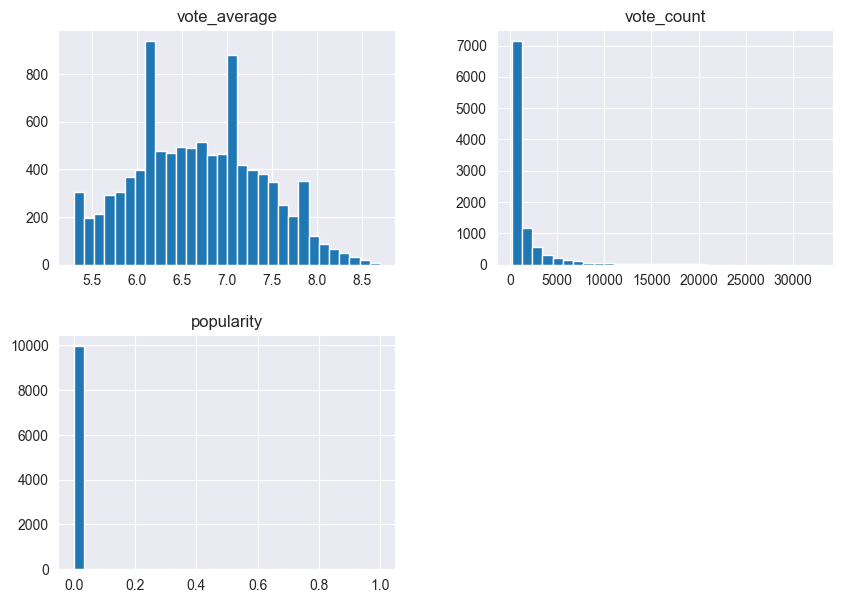

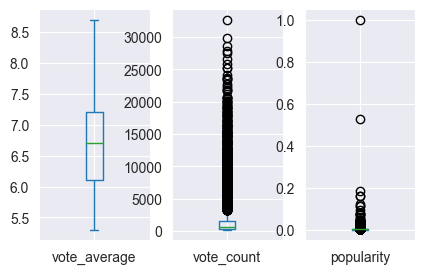

C:\Users\dagbo\AppData\Local\Temp\ipykernel_2000\2026522272.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = movie_df[numerical_features].corr()


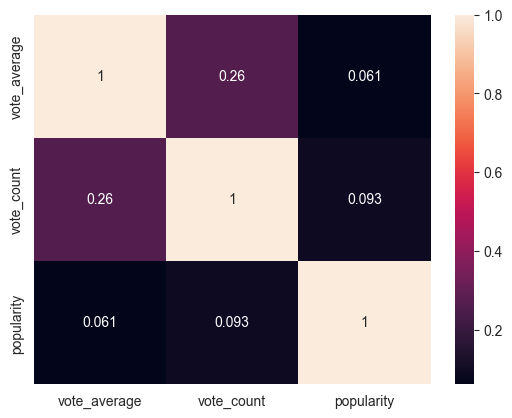

,id,original_language,original_title,overview,popularity,release_date,title,vote_average,vote_count,release_year
0,851644,24,20세기 소녀,Yeon-du asks her best friend Bora to collect a...,0.018598,2022-10-06,20th Century Girl,8.7,290,2022
1,238,9,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",0.009403,1972-03-14,The Godfather,8.7,16988,1972
2,278,9,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,0.009202,1994-09-23,The Shawshank Redemption,8.7,22748,1994
3,240,9,The Godfather Part II,In the continuing saga of the Corleone crime f...,0.004854,1974-12-20,The Godfather Part II,8.6,10293,1974
4,667257,10,Cosas imposibles,"Matilde is a woman who, after the death of her...",0.003530,2021-06-17,Impossible Things,8.6,299,2021
...,...,...,...,...,...,...,...,...,...,...
9995,11375,9,Hollywood Homicide,"Joe Gavilan and his new partner K. C. Calden, ...",0.000978,2003-06-09,Hollywood Homicide,5.3,529,2003
9996,298614,15,Une heure de tranquillité,"Michel, who's crazy about jazz, has just found...",0.000573,2014-12-31,Do Not Disturb,5.3,304,2014
9997,50357,9,Apollo 18,"Officially, Apollo 17 was the last manned miss...",0.005561,2011-07-20,Apollo 18,5.3,839,2011
9998,97795,9,Emergo,A team of parapsychologists sets out to invest...,0.000616,2011-10-11,Apartment 143,5.3,242,2011


In [175]:
#eda
# Plot histograms of numerical features
numerical_features = ['vote_average', 'vote_count', 'release_date', 'popularity']
movie_df[numerical_features].hist(bins=30, figsize=(10,7))
plt.show()

# Plot box plots of numerical features
movie_df[numerical_features].plot(kind='box', subplots=True, layout=(1,6), sharex=False, sharey=False, figsize=(10,3))
plt.show()

# Calculate the correlation matrix of the numerical features
corr_matrix = movie_df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Select features with a correlation coefficient greater than 0.1 with the target variable
threshold = 0.1
important_features = corr_matrix[corr_matrix['vote_average'] > threshold].index
movies_df = movie_df[important_features]
movie_df


using cosine similarity

In [176]:
# Create a matrix of movies with genre and release date as features
matrix = movie_df.pivot_table(index='title', values='popularity', columns='release_date')

# Fill  NaN values with 0
matrix.fillna(0, inplace=True)

# Convert the matrix into a dense numpy array
matrix = matrix.values
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [177]:
# Import the cosine_similarity function
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity between all movies
cosine_similarity = cosine_similarity(matrix)


In [178]:
# Create a function that takes a movie title as input and returns the top 10 similar movies
def recommend_movies(title, cosine_similarity=cosine_similarity):
    # Get the index of the movie from the movie_df DataFrame
    movie_index = movie_df[movie_df['title'] == title].index[0]

    # Get the cosine similarity scores for the movie
    scores = list(enumerate(cosine_similarity[movie_index]))

    # Sort the scores in descending order
    scores = sorted(scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 scores
    scores = scores[:11]

    # Get the movie indices from the scores
    movie_indices = [i[0] for i in scores]

    # Return the top 10 similar movies
    return movie_df['title'].iloc[movie_indices]



In [179]:
# Test the get_recommendation function
movie = 'Le Trou'
num_recs = 5
recs = recommend_movies(movie)
print("Recommendations for {}:".format(movie))
for i, rec in enumerate(recs[1:num_recs+1]):
    title = rec
    print("{}. {}".format(i+1, title))

Recommendations for Le Trou:
1. 20th Century Girl
2. The Godfather
3. The Shawshank Redemption
4. The Godfather Part II
5. Impossible Things


C:\Users\dagbo\AppData\Local\Temp\ipykernel_2000\775323761.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  for i, rec in enumerate(recs[1:num_recs+1]):
